## 1. Read in the Results_x.txt files

In [34]:
import matplotlib.pyplot as plt
import numpy as np

filename = 'results_0.txt'
infile = open(filename, 'r')
infile.readline()  # skip the first line
data = [line.split() for line in infile]
infile.close()
Data_original = [float(j) for j in data[0]]
for i in range(1,len(data)):
    Data_original = np.vstack([Data_original,[float(j) for j in data[i]]])

Data_c = Data_original
Data_c

array([[  1.20400000e+05,   8.81737755e+02,   8.71213380e+02, ...,
          8.82000000e+02,   8.71000000e+02,   8.92786000e+05],
       [  1.20400000e+05,   5.06503370e+02,   5.06356338e+02, ...,
          5.07000000e+02,   5.06000000e+02,   5.18651000e+05],
       [  1.20400000e+05,   5.12605168e+02,   5.12453184e+02, ...,
          5.13000000e+02,   5.12000000e+02,   5.24801000e+05],
       ..., 
       [  1.20509000e+05,   3.37720943e+02,   2.99699980e+02, ...,
          3.38000000e+02,   3.00000000e+02,   3.07538000e+05],
       [  1.20509000e+05,   9.56620923e+02,   1.02912988e+02, ...,
          9.57000000e+02,   1.03000000e+02,   1.06429000e+05],
       [  1.20509000e+05,   5.12837829e+02,   5.12657879e+02, ...,
          5.13000000e+02,   5.13000000e+02,   5.25825000e+05]])

In [6]:
Data_vxy = Data_c[:,1:3]
n = 0
col_num = []
for i in range(1,len(Data_c)):
    if Data_c[i,0] == Data_c[i-1,0]:
        n += 1
    else:
        col_num += [n+1]
        n = 0
atom_max = int(np.max(col_num))

## 2. Applying clustering algorithm

('We find', 2, 'atoms')
('There are', 81, 'outliers. Please have a look at them.')


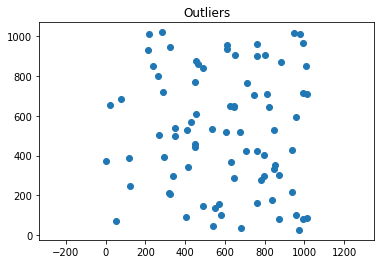

You can change the variables: eps and min_samples
Please increase eps if you get too many atoms or there are outliers
Please increase min_samples if you get too many atoms
('You chose eps =', 5, 'and min_samples =', 10)
Type in the new eps that you want to test(0 to stop): 0
Type in the new min_samples that you want to test(0 to stop): 0
('The', 2, 'cluster centers are \n', array([[ 506.33193173,  506.32664108],
       [ 512.65997884,  512.62459486]]))


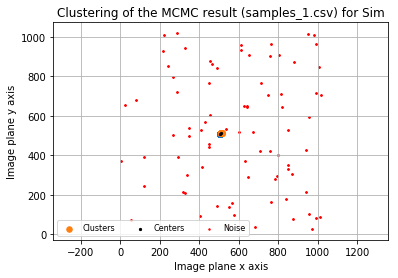

Do you want to try one more time to find the cluster?(y/n)
'n'


In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

def find_center(Data, atom_max, min_samples = 10, eps = 5):
    """
    find the centers for each data set using DBSCAN.
    Data should be a n*2 array.
    """
    while(eps and min_samples):
        db = DBSCAN(eps, min_samples).fit(Data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        atom = len(set(labels)) - (1 if -1 in labels else 0) # number of atoms
        print ('We find', atom, 'atoms')
        if atom > atom_max:
            print ('You need to increase the variable: min_samples')
            print (atom, 'is even bigger than the possible biggest atom number', atom_max)
        unique_labels = set(labels)
        noise_label = (labels == -1)
        noise = Data[noise_label & ~core_samples_mask]
        if len(noise) == 0:
            print ('There is no outlier.')
        else:
            print ('There are', len(noise), 'outliers. Please have a look at them.')
            plt.scatter(noise[:,0], noise[:,1])
            plt.title('Outliers')
            #plt.xlim([0,1])
            #plt.ylim([0,1])
            plt.axis('equal')
            plt.show()
        print ("You can change the variables: eps and min_samples")
        print ("Please increase eps if you get too many atoms or there are outliers")
        print ("Please increase min_samples if you get too many atoms")
        eps_new = eps
        min_samples_new = min_samples
        print ('You chose eps =', eps_new, 'and min_samples =', min_samples_new)
        eps = float(input("Type in the new eps that you want to test(0 to stop): "))
        min_samples = int(input("Type in the new min_samples that you want to test(0 to stop): "))
    xy = []
    centers = np.zeros((atom,2))
    for k in range(atom):
        class_member_mask = (labels == k)
        xy += [Data[class_member_mask & core_samples_mask]]
        centers[k] = np.mean(Data[class_member_mask & core_samples_mask], axis = 0)
    print ('The', atom, 'cluster centers are \n', centers)
    return atom, xy, noise, labels, centers, eps_new, min_samples_new

def find_center_mul(Data_vxy, atom_max, onemore = 'y'):
    """
    find the centers many times until you are happy.
    """
    eps_new = 5
    min_samples_new = 10
    while onemore == 'y' or onemore == 'Y':
        atom, xy, noise, labels, centers, eps_new, min_samples_new = find_center(Data_vxy, atom_max, min_samples_new, eps_new)
        col = ['b', 'g', 'r', 'c', 'm'] * atom
        fig = plt.figure()
        for i in range(atom):
            l1 = plt.scatter(xy[i][:,0], xy[i][:,1], s = 30)
            l2 = plt.scatter(centers[:,0], centers[:,1], c = 'k', s = 5)
            l3 = plt.scatter(noise[:,0], noise[:,1], c = 'r', s = 2)
            plt.grid(True)
            #plt.xlim(0, 1)
            #plt.ylim(0, 1)
            plt.axes().set_aspect('equal', 'datalim')
        plt.title('Clustering of the MCMC result (samples_1.csv) for Sim')
        plt.xlabel('Image plane x axis')
        plt.ylabel('Image plane y axis')
        plt.legend((l1, l2, l3),
           ('Clusters', 'Centers', 'Noise'),
           ncol=3,
           fontsize=8)
        fig.savefig('result_1.png')
        plt.show()
        onemore = str(input("Do you want to try one more time to find the cluster?(y/n)\n"))
    return atom, xy, noise, labels, centers

atom, xy, noise, labels, centers = find_center_mul(Data_vxy, atom_max)

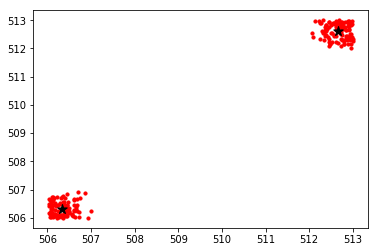

In [32]:
for i in range(atom):
    plt.scatter(xy[i][:,0], xy[i][:,1], c = 'r', s = 10)
    plt.scatter(centers[i,0], centers[i,1], c = 'k', s = 100, marker = '*')
plt.show()


## 3. Distance of the clusters

In [33]:
def distance(point1, point2):
    """
    Euclidean distance from point1 and point2
    >>>distance([0.1, 0.1], [0.2, 0.1])
    >>>0.1
    >>>distance([0.2, 0.1], [0.2, 0.1])
    >>>0.0
    """
    return np.abs((point1[0] - point2[0]) + complex(0,1)*(point1[1]- point2[1]))

d = distance(centers[0], centers[1])
d

8.9279562134162322

In [43]:
def angle_between(p1, p2):
    p1x = p1[0]
    p1y = p1[1]
    p2x = p2[0]
    p2y = p2[1]
    ang = np.arctan((p1y - p2y)/(p1x - p2x))
    return ang/np.pi*180

ang = angle_between(centers[0], centers[1])
ang

44.86343911283754